In [1]:
from convokit import Corpus, download

## Preprocessing

In [5]:
# filter subreddits and save locally
subreddit = "Christian"
corpus = Corpus(filename=download(f'subreddit-{subreddit}'), storage_type='mem')
small = Corpus.filter_utterances(corpus, lambda x: x.timestamp >= 1504238400)
small.print_summary_stats()
small.dump(f"subreddit-{subreddit}-small", base_path = "./")

# load to mongo if needed
# Corpus(f"subreddit-{subreddit}-small", storage_type='db')

## FightingWords

In [ ]:
from convokit import FightingWords

Finished loading corpus_1
Finished loading corpus_2
Finished merging
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 32057 valid corpus components. class2_func returned 188689 valid corpus components.
Vocab size is 15000
Comparing language...
ngram zscores computed.


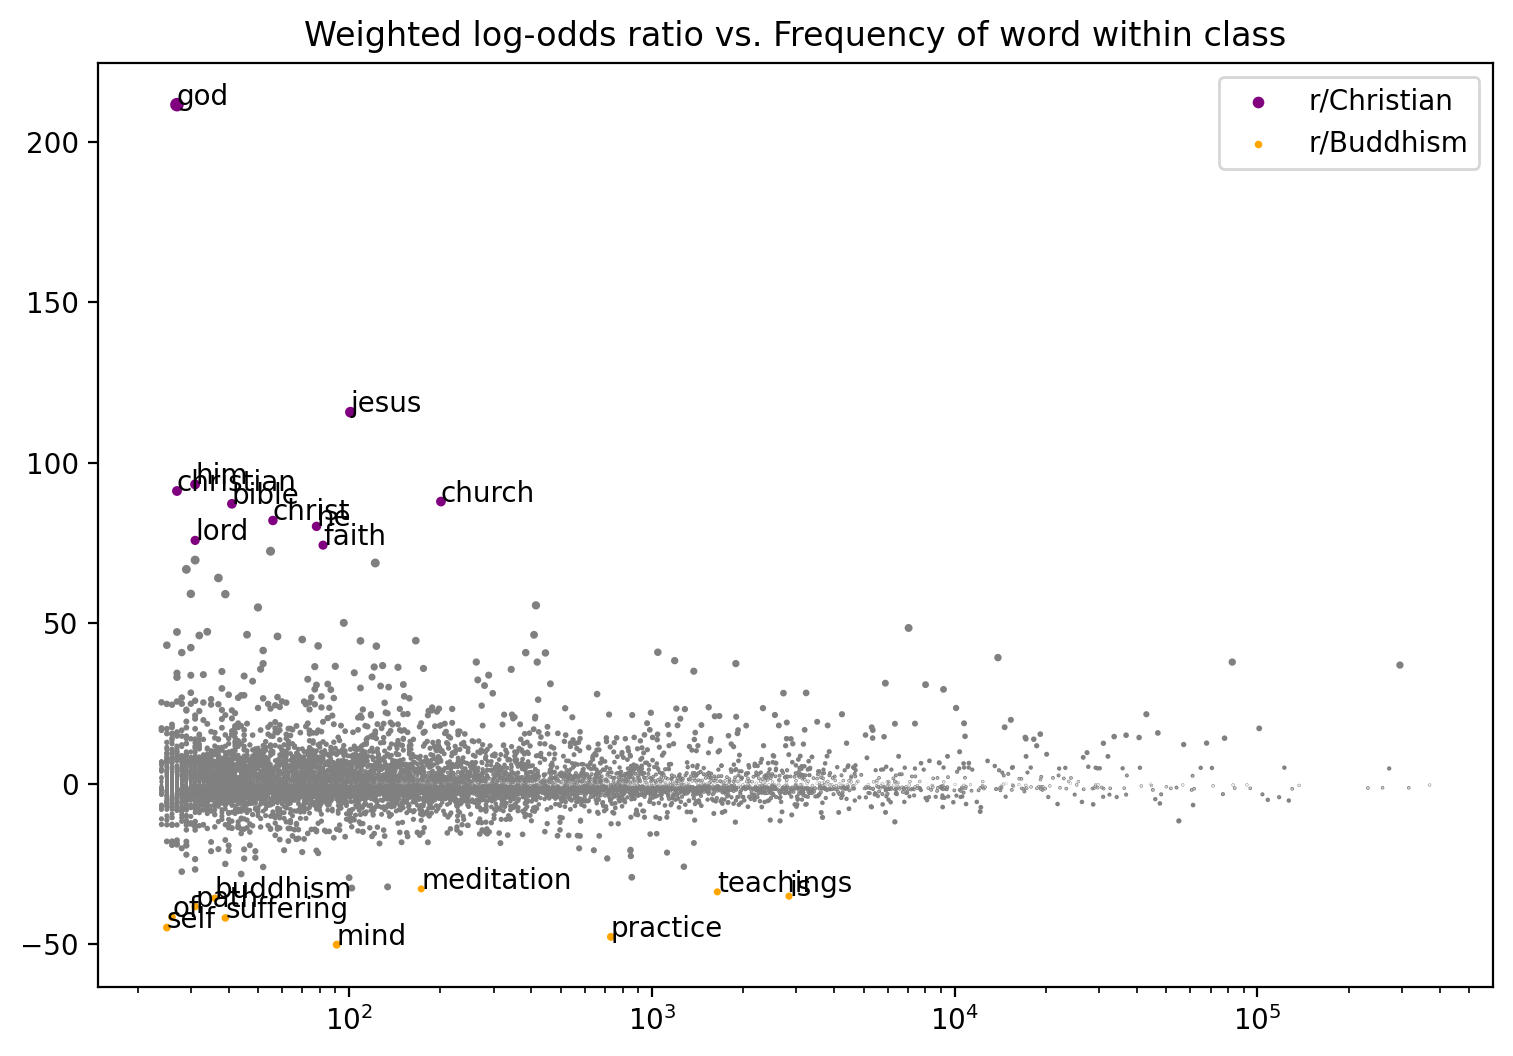

In [43]:
## This is too slow (especially when merding two corpuses)
# corpus_1 = Corpus.reconnect_to_db("subreddit-hinduism-small")
# corpus_2 = Corpus.reconnect_to_db("subreddit-judaism-small")

# locally is faster
corpus_1 = Corpus("subreddit-Christian-small", storage_type='mem')
print("Finished loading corpus_1")
corpus_2 = Corpus("subreddit-Buddhism-small", storage_type='mem')
print("Finished loading corpus_2")
corpus = Corpus.merge(corpus_1, corpus_2)
print("Finished merging")
fw = FightingWords(ngram_range=(1,1))
fw.fit(corpus, class1_func=lambda utt: utt.meta['permalink'].startswith('/r/Christian'), 
               class2_func=lambda utt: utt.meta['permalink'].startswith('/r/Buddhism'),)

df = fw.summarize(corpus, plot=True, class1_name='r/Christian', class2_name='r/Buddhism')